## Cosine Similarity Calculations
Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Similarity measures have a multiude of uses in machine learning projects; they come in handy when matching strings, measuring distance, and extracting features. This similarity measurement is particularly concerned with orientation, rather than magnitude. 
In this case study, you'll use the cosine similarity to compare both a numeric data within a plane and a text dataset for string matching.

Load the Python modules, including cosine_similarity, from sklearn.metrics.pairwise

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

**<font color='teal'> Load the distance dataset into a dataframe. </font>**

In [68]:
df = pd.read_csv('distance_dataset (1).csv')

In [69]:
df.head()

,Unnamed: 0,X,Y,Z,ClusterID
0,0,5.135779,4.167542,5.787635,4
1,1,4.280721,5.770909,6.091044,4
2,2,8.329098,7.540436,3.247239,2
3,3,5.470224,5.069249,5.768313,4
4,4,2.381797,2.402374,3.879101,1


### Cosine Similarity with clusters and numeric matrices

All points in our dataset can be thought of as feature vectors. We illustrate it here as we display the __Cosine Similarity__ between each feature vector in the YZ plane and the [5, 5] vector we chose as reference. The sklearn.metrics.pairwise module provides an efficient way to compute the __cosine_similarity__ for large arrays from which we can compute the similarity.

 **<font color='teal'> First, create a 2D and a 3D matrix from the dataframe. The 2D matrix should contain the 'Y' and 'Z' columns and the 3D matrix should contain the 'X','Y', and 'Z' columns.</font>**

In [70]:
matrix_2D = df.loc[:, 'Y':'Z'].to_numpy()
matrix_3D = df.loc[:, 'X':'Z'].to_numpy()

Calculate the cosine similarity for those matrices with reference planes of 5,5 and 5,5,5. Then subtract those measures from 1 in new features.

In [71]:
simCosine3D = 1. - cosine_similarity(matrix_3D, [[5,5,5]])  #, 'cosine')
simCosine = 1. - cosine_similarity(matrix_2D, [[5,5]])      #, 'cosine')

In [72]:
import math

df_2D = pd.concat([df, pd.DataFrame(simCosine, columns=['simCosine'])], axis=1)

df_2D['degrees'] = (1 - df_2D['simCosine']).apply(math.acos).apply(math.degrees)
with pd.option_context('display.width', 100): 
    print(df_2D.describe())

filter = np.round(df_2D['degrees'], 1) == 22.4
df_2D[filter].sort_values(by = 'degrees').head(3)

        Unnamed: 0            X            Y            Z    ClusterID     simCosine      degrees
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  2.000000e+03  2000.000000
mean    999.500000     5.002561     5.032657     5.017639     3.000000  4.075392e-02    14.221584
std     577.494589     1.935367     1.956047     1.957894     1.414567  3.583294e-02     8.285653
min       0.000000     1.170533     1.350509     1.015867     1.000000  4.856358e-08     0.017856
25%     499.750000     4.544975     3.704038     3.790899     2.000000  7.633126e-03     7.083785
50%     999.500000     4.998504     5.081169     5.015852     3.000000  3.087746e-02    14.275198
75%    1499.250000     5.457089     6.348823     6.345780     4.000000  7.308431e-02    22.040979
max    1999.000000     8.983353     8.343726     8.600705     5.000000  1.791969e-01    34.834729


,Unnamed: 0,X,Y,Z,ClusterID,simCosine,degrees
1851,1851,7.465128,7.734844,3.227181,2,0.075140,22.352813
1163,1163,4.614635,6.567724,2.737161,5,0.075292,22.375607
1807,1807,2.032808,2.019225,4.847690,1,0.075365,22.386634


Using the 2D matrix and the reference plane of (5,5) we can use a scatter plot to view the way the similarity is calculated using the Cosine angle.

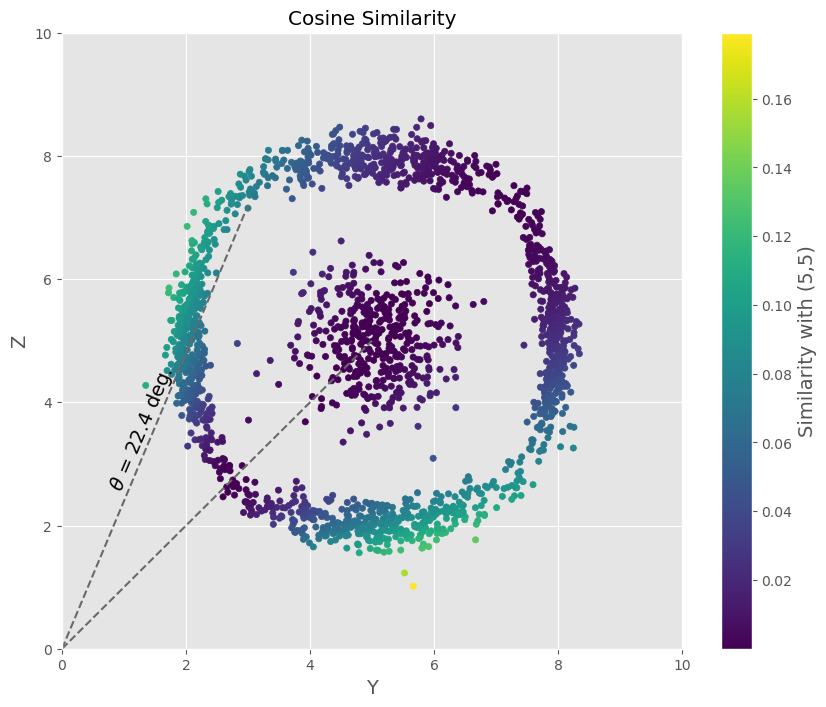

In [73]:
figCosine = plt.figure(figsize=[10,8])

plt.scatter(matrix_2D[:, 0], matrix_2D[:, 1], c=simCosine[:,0], s=20)
plt.plot([0,5],[0,5], '--', color='dimgray')
plt.plot([0,3],[0,7.2], '--', color='dimgray')
plt.text(0.7,2.6,r'$\theta$ = 22.4 deg.', rotation=67, size=14)
plt.ylim([0,10])
plt.xlim([0,10])
plt.xlabel('Y', size=14)
plt.ylabel('Z', size=14)
plt.title('Cosine Similarity')
cb = plt.colorbar()
cb.set_label('Similarity with (5,5)', size=14)
plt.show()
#figCosine.savefig('similarity-cosine.png')

Now, plot the 3D matrix with the similarity and the reference plane, (5,5,5).

In [74]:
import math

df_3D = pd.concat([df, pd.DataFrame(simCosine3D, columns=['simCosine3D'])], axis=1)

df_3D['degrees'] = (1 - df_3D['simCosine3D']).apply(math.acos).apply(math.degrees)
with pd.option_context('display.width', 100): 
    print(df_3D.describe())

filter = np.round(df_3D['degrees'], 2) == 22.40
df_3D[filter].sort_values(by = 'degrees').head(3)

        Unnamed: 0            X            Y            Z    ClusterID   simCosine3D      degrees
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  2.000000e+03  2000.000000
mean    999.500000     5.002561     5.032657     5.017639     3.000000  4.056496e-02    14.477421
std     577.494589     1.935367     1.956047     1.957894     1.414567  3.647771e-02     7.753018
min       0.000000     1.170533     1.350509     1.015867     1.000000  7.140810e-07     0.068472
25%     499.750000     4.544975     3.704038     3.790899     2.000000  1.060500e-02     8.351749
50%     999.500000     4.998504     5.081169     5.015852     3.000000  3.099176e-02    14.301736
75%    1499.250000     5.457089     6.348823     6.345780     4.000000  6.066790e-02    20.060308
max    1999.000000     8.983353     8.343726     8.600705     5.000000  1.796821e-01    34.883371


,Unnamed: 0,X,Y,Z,ClusterID,simCosine3D,degrees
1889,1889,7.907194,7.402968,2.487603,2,0.075422,22.395194
407,407,4.966453,6.270550,1.946770,5,0.075423,22.395322
1529,1529,1.779232,2.235265,4.439565,1,0.075467,22.402034


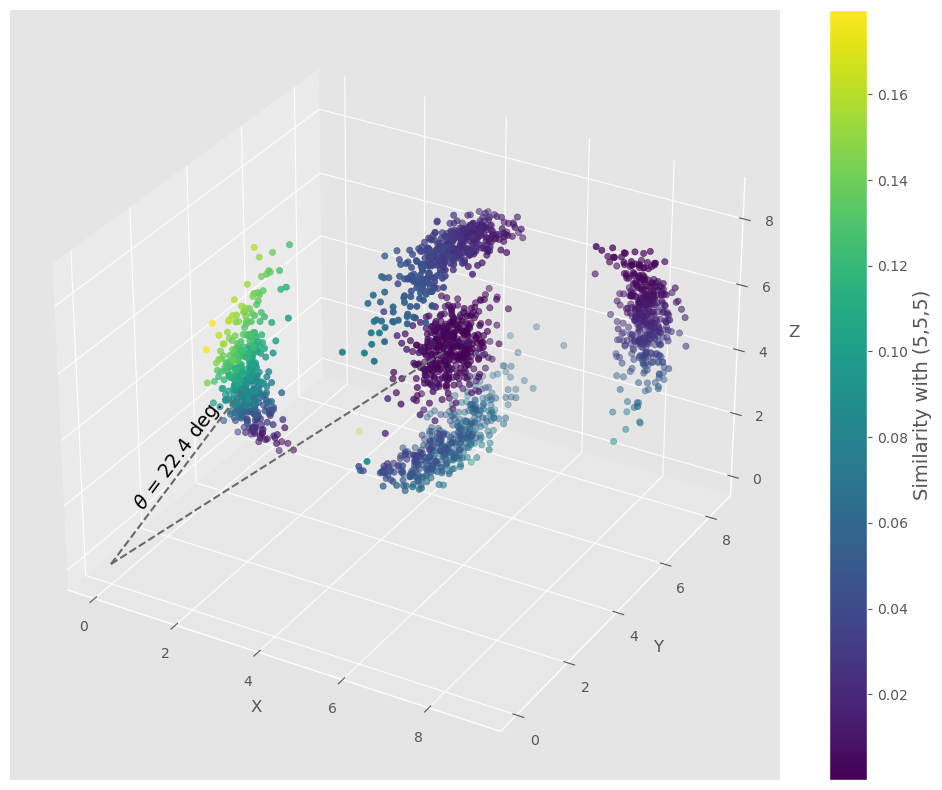

In [75]:
from mpl_toolkits.mplot3d import Axes3D

zdir = tuple(df_3D.loc[1529, 'X':'Z'])

figCosine3D = plt.figure(figsize=(10, 8))
ax = figCosine3D.add_subplot(111, projection='3d')

p = ax.scatter(matrix_3D[:,0], matrix_3D[:,1], matrix_3D[:,2], c=simCosine3D[:,0])
plt.plot([0,5],[0,5], [0,5], '--', color='dimgray')
plt.plot([0, df_3D.loc[1529, 'X']],[0,df_3D.loc[1529, 'Y']], [0, df_3D.loc[1529, 'Z']], '--', color='dimgray')
ax.text(0.0, 0.7, 1.2, r'$\theta$ = 22.4 deg.', zdir = zdir, size=14)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
cb = figCosine3D.colorbar(p)
cb.set_label('Similarity with (5,5,5)', size=14)
                                   
figCosine3D.tight_layout()
plt.show()
#figCosine3D.savefig('cosine-3D.png', dpi=300, transparent=True)

----

### Cosine Similarity with text data
This is a quick example of how you can use Cosine Similarity to compare different text values or names for record matching or other natural language proecessing needs. 
First, we use count vectorizer to create a vector for each unique word in our Document 0 and Document 1. 

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
Document1 = "Starbucks Coffee"
Document2 = "Essence of Coffee"

corpus = [Document1,Document2]

X_train_counts = count_vect.fit_transform(corpus)

pd.DataFrame(X_train_counts.toarray(),columns=count_vect.get_feature_names_out(),index=['Document 0','Document 1'])

,coffee,essence,of,starbucks
Document 0,1,0,0,1
Document 1,1,1,1,0


Now, we use a common frequency tool called TF-IDF to convert the vectors to unique measures.

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(corpus)
pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names_out(),index=['Document 0','Document 1'])

,coffee,essence,of,starbucks
Document 0,0.579739,0.000000,0.000000,0.814802
Document 1,0.449436,0.631667,0.631667,0.000000


Here, we finally apply the __Cosine Similarity__ measure to calculate how similar Document 0 is compared to any other document in the corpus. Therefore, the first value of 1 is showing that the Document 0 is 100% similar to Document 0 and 0.26055576 is the similarity measure between Document 0 and Document 1.

In [78]:
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.26055567]])

Replace the current values for `Document 0` and `Document 1` with your own sentence or paragraph and apply the same steps as we did in the above example.

 **<font color='teal'> Combine the documents into a corpus.</font>**

In [79]:
import re
my_count_vect = CountVectorizer()
my_Document1 = "Here, we finally apply the Cosine Similarity measure to calculate how similar Document 0 is compared to any other document in the corpus. Therefore, the first value of 1 is showing that the Document 0 is 100% similar to Document 0 and 0.26055576 is the similarity measure between Document 0 and Document 1."
my_Document2 = ' '.join(sorted(re.split(r'\W+', my_Document1)))
my_Document3 = 'we finally apply the Cosine Similarity measure to calculate how similar Document 0 is compared to any other document in the corpus'

my_corpus = [my_Document1, my_Document2, my_Document3]

 **<font color='teal'> Apply the count vectorizer to the corpus to transform it into vectors.</font>**

In [80]:
X_train_counts = my_count_vect.fit_transform(my_corpus)

 **<font color='teal'> Convert the vector counts to a dataframe with Pandas.</font>**

In [81]:
with pd.option_context('display.max_columns', 29):
    print(pd.DataFrame(X_train_counts.toarray(),columns=my_count_vect.get_feature_names_out(),index=['Document 1','Document 2', 'Document 3']))

            100  26055576  and  any  apply  between  calculate  compared  \
Document 1    1         1    2    1      1        1          1         1   
Document 2    1         1    2    1      1        1          1         1   
Document 3    0         0    0    1      1        0          1         1   

            corpus  cosine  document  finally  first  here  how  in  is  \
Document 1       1       1         6        1      1     1    1   1   4   
Document 2       1       1         6        1      1     1    1   1   4   
Document 3       1       1         2        1      0     0    1   1   1   

            measure  of  other  showing  similar  similarity  that  the  \
Document 1        2   1      1        1        2           2     1    5   
Document 2        2   1      1        1        2           2     1    5   
Document 3        1   0      1        0        1           1     0    2   

            therefore  to  value  we  
Document 1          1   3      1   1  
Document 2     

 **<font color='teal'> Apply TF-IDF to convert the vectors to unique frequency measures.</font>**

In [82]:
my_vectorizer = TfidfVectorizer()
my_trsfm=my_vectorizer.fit_transform(my_corpus)
with pd.option_context('display.max_columns', 29):
    print(pd.DataFrame(my_trsfm.toarray(),columns=my_vectorizer.get_feature_names_out(),index=['Document 1','Document 2', 'Document 3']))

                 100  26055576       and       any     apply   between  \
Document 1  0.111988  0.111988  0.223975  0.086968  0.086968  0.111988   
Document 2  0.111988  0.111988  0.223975  0.086968  0.086968  0.111988   
Document 3  0.000000  0.000000  0.000000  0.192450  0.192450  0.000000   

            calculate  compared    corpus    cosine  document   finally  \
Document 1   0.086968  0.086968  0.086968  0.086968  0.521811  0.086968   
Document 2   0.086968  0.086968  0.086968  0.086968  0.521811  0.086968   
Document 3   0.192450  0.192450  0.192450  0.192450  0.384900  0.192450   

               first      here       how        in        is   measure  \
Document 1  0.111988  0.111988  0.086968  0.086968  0.347874  0.173937   
Document 2  0.111988  0.111988  0.086968  0.086968  0.347874  0.173937   
Document 3  0.000000  0.000000  0.192450  0.192450  0.192450  0.192450   

                  of     other   showing   similar  similarity      that  \
Document 1  0.111988  0.08696

 **<font color='teal'> Use the cosine similarity function to get measures of similarity for the sentences or paragraphs in your original document.</font>**

In [83]:
table = cosine_similarity(my_trsfm, my_trsfm)

In [84]:
print(pd.DataFrame(table, columns=['Document 1', 'Document2', 'Document 3'], index=['Document 1', 'Document 2', 'Document 3']))

            Document 1  Document2  Document 3
Document 1    1.000000   1.000000    0.820117
Document 2    1.000000   1.000000    0.820117
Document 3    0.820117   0.820117    1.000000
